In [143]:
#Average Joe in the League versus the Big Five
#A glimpse into the 2015-2016 season player profiles

#What is the average player profile in a given season and how does
#it compare to the best players in the league?
#Does this correlate to salary, more specifically, how similar or different
#is the average player in comparison to the highest paid players?
#Additionally, how does age and college attendance factor into effect on salary?

In [144]:
#I was curious to see what the average player profile in the NBA in a 
#given year looks in terms of height, weight, age and salary. Moreover, 
#I wanted to see if the highest paid players in the league are close to the
#average type of player in the league or drastically different. Additionally,
#I wanted to know if there is any correlation to the college a player
#attended, if they did at all, with how much money they made in this 
#particular season.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df = pd.read_csv('nba2015_16.csv')

In [147]:
data = pd.read_csv("nba2015_16.csv")
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (458, 9)


In [148]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [149]:
data = pd.read_csv("nba2015_16.csv", index_col ="Name")
first = data[["Team", "Position", "Age", "Height", "Weight", "College", "Salary"]]
first

,Team,Position,Age,Height,Weight,College,Salary
Name,,,,,,,
Avery Bradley,Boston Celtics,PG,25.0,6-2,180.0,Texas,7730337.0
Jae Crowder,Boston Celtics,SF,25.0,6-6,235.0,Marquette,6796117.0
John Holland,Boston Celtics,SG,27.0,6-5,205.0,Boston University,NaN
R.J. Hunter,Boston Celtics,SG,22.0,6-5,185.0,Georgia State,1148640.0
Jonas Jerebko,Boston Celtics,PF,29.0,6-10,231.0,NaN,5000000.0
Amir Johnson,Boston Celtics,PF,29.0,6-9,240.0,NaN,12000000.0
Jordan Mickey,Boston Celtics,PF,21.0,6-8,235.0,LSU,1170960.0
Kelly Olynyk,Boston Celtics,C,25.0,7-0,238.0,Gonzaga,2165160.0
Terry Rozier,Boston Celtics,PG,22.0,6-2,190.0,Louisville,1824360.0


In [150]:
row1 = data.iloc [:, [4]]
print(row1)

                        Height
Name                          
Avery Bradley              6-2
Jae Crowder                6-6
John Holland               6-5
R.J. Hunter                6-5
Jonas Jerebko             6-10
Amir Johnson               6-9
Jordan Mickey              6-8
Kelly Olynyk               7-0
Terry Rozier               6-2
Marcus Smart               6-4
Jared Sullinger            6-9
Isaiah Thomas              5-9
Evan Turner                6-7
James Young                6-6
Tyler Zeller               7-0
Bojan Bogdanovic           6-8
Markel Brown               6-3
Wayne Ellington            6-4
Rondae Hollis-Jefferson    6-7
Jarrett Jack               6-3
Sergey Karasev             6-7
Sean Kilpatrick            6-4
Shane Larkin              5-11
Brook Lopez                7-0
Chris McCullough          6-11
Willie Reed               6-10
Thomas Robinson           6-10
Henry Sims                6-10
Donald Sloan               6-3
Thaddeus Young             6-8
...     

In [151]:
df['cvrtd_ht'] = df.loc[:, 'Height']

In [152]:
df = pd.read_csv('nba2015_16.csv')
df['cvrtd_ht'] = df.loc[:, 'Height']

def converter(x):
    try:
        return ' '.join([x for x in str(x).split() if x not in df.loc[:, 'Height']])
    except AttributeError:
        return None  # or some other value

df['cvrtd_ht'] = df.loc[:, 'Height'].apply(converter)

def parse_ht(ht):
    #format: 6-4
    if ht == 'nan':
        return float('nan')
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_
print (df['cvrtd_ht'].apply(lambda x:parse_ht(x)))

0      74.0
1      78.0
2      77.0
3      77.0
4      82.0
5      81.0
6      80.0
7      84.0
8      74.0
9      76.0
10     81.0
11     69.0
12     79.0
13     78.0
14     84.0
15     80.0
16     75.0
17     76.0
18     79.0
19     75.0
20     79.0
21     76.0
22     71.0
23     84.0
24     83.0
25     82.0
26     82.0
27     82.0
28     75.0
29     80.0
       ... 
428    81.0
429    77.0
430    78.0
431    82.0
432    81.0
433    77.0
434    84.0
435    85.0
436    75.0
437    76.0
438    79.0
439    83.0
440    73.0
441    81.0
442    80.0
443    73.0
444    78.0
445    78.0
446    82.0
447    85.0
448    80.0
449    80.0
450    80.0
451    78.0
452    82.0
453    75.0
454    73.0
455    87.0
456    84.0
457     NaN
Name: cvrtd_ht, Length: 458, dtype: float64


In [153]:
df['cvrtd_ht'].apply(lambda x:parse_ht(x)).describe()

count    457.000000
mean      79.190372
std        3.432442
min       69.000000
25%       77.000000
50%       80.000000
75%       82.000000
max       87.000000
Name: cvrtd_ht, dtype: float64

In [154]:
#After analyzing the dataset, the average height of a player in the 
#2015-2016 season is 79.19 inches, or approximately 6ft-7in; the tallest
#player is 7-3, the shortest is 5-9 with a standard deviation
#of 3.43 inches. While the average height is 6-7, the most common height
#(mode) is 6-9, which accounts for 59 players or 12.9% of all players in
#the league.

In [155]:
data.describe(include=['O'])

,Team,Position,Height,College
count,457,457,457,373
unique,30,5,18,118
top,New Orleans Pelicans,SG,6-9,Kentucky
freq,19,102,59,22


In [156]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [157]:
data.describe(include=['O'])

,Team,Position,Height,College
count,457,457,457,373
unique,30,5,18,118
top,New Orleans Pelicans,SG,6-9,Kentucky
freq,19,102,59,22


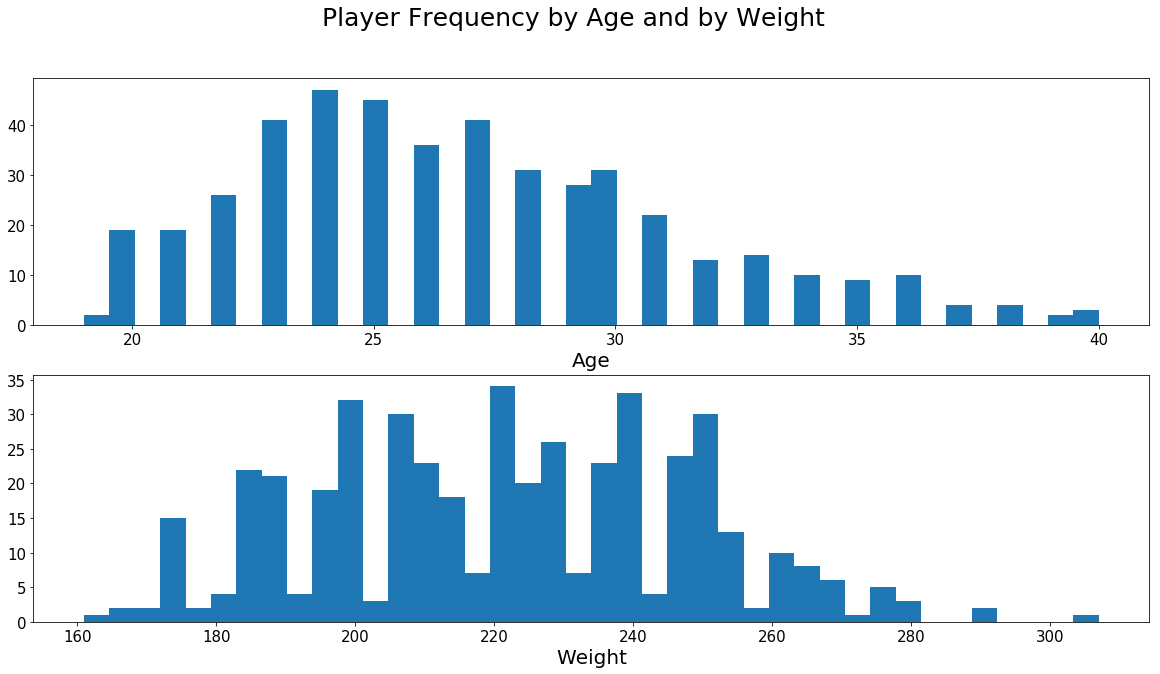

In [158]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 1)
num_features = ['Age', 'Weight']
xaxes = num_features
yaxes = ['Counts']

axes = axes.ravel()
for idx, ax in enumerate(axes):
    
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    plt.suptitle('Player Frequency by Age and by Weight', fontsize=25)

In [9]:
df.loc[:, 'Weight'].describe()

count    457.000000
mean     221.522976
std       26.368343
min      161.000000
25%      200.000000
50%      220.000000
75%      240.000000
max      307.000000
Name: Weight, dtype: float64

In [ ]:
#The average body weight of a player is 221.5 pounds with a minimum weight
#of 161.0 pounds, a maximum weight of 307.0 pounds. Generally speaking,
#basketball players are muscular, but lean so prior to the analysis,
#I would have guessed no player would be remotely close to a weight of 
#300 pounds, since typically one would associate heavier weights to
#football players. This shows, 75% of the players are at least 
#200 pounds or more. The outliers on either end can be attributed to perhaps
#differences in height and muscle mass, among other variables.

In [11]:
df.loc[:, 'Age'].describe()

count    457.000000
mean      26.938731
std        4.404016
min       19.000000
25%       24.000000
50%       26.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64

In [ ]:
#The average age of a player in this dataset is 26.9 years old, with the
#youngest player only 19.0 years old and the oldest at 40.0 years old. 
#The minimum age requirement to be eligible for the NBA draft is 19 years
#old, so I was expecting the youngest age to be at this minimum, however
#the oldest player coming in at 40 years old is more than 3 standard deviations
#away from the mean, an extreme outlier.

In [ ]:
#The average player profile for the 2015-2016 season is as follows:
#there are 30 teams total, 457 players in the league, the average height
#is 79.19 inches or 6ft-7in, the average weight is 221.5 lbs, and the 
#average age is 26.9 years old.

In [10]:
df.loc[:, 'Salary'].describe()

count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64

In [ ]:
#The average salary of a player in the league was $4,842,684, with a high
#of $25,000,000 and the lowest salary at $30,888. The standard deviation
#in this particular subset is not a good indication how salary differs
#amongst the players because given common knowledge of basketball, it is
#known that rookie and veteran players are likely to have drastically
#different salaries.

In [128]:
row2 = data.iloc [:, [7]]
print(row2.sort_values(by='Salary', ascending=False))
#change False to True to get lowest salaries on top

                            Salary
Name                              
Kobe Bryant             25000000.0
LeBron James            22970500.0
Carmelo Anthony         22875000.0
Dwight Howard           22359364.0
Chris Bosh              22192730.0
Chris Paul              21468695.0
Kevin Durant            20158622.0
Derrick Rose            20093064.0
Dwyane Wade             20000000.0
LaMarcus Aldridge       19689000.0
DeAndre Jordan          19689000.0
Brook Lopez             19689000.0
Kevin Love              19689000.0
Marc Gasol              19688000.0
Blake Griffin           18907726.0
Paul Millsap            18671659.0
Paul George             17120106.0
Russell Westbrook       16744218.0
Kyrie Irving            16407501.0
Enes Kanter             16407500.0
Jimmy Butler            16407500.0
Wesley Matthews         16407500.0
Greg Monroe             16407500.0
Kawhi Leonard           16407500.0
Tobias Harris           16000000.0
John Wall               15851950.0
DeMarcus Cousins    

In [ ]:
#Some say the most valuable player is and should be the highest paid player
#in the league and on each team, but then again, each team has varying
#needs and has a unique playing style that could require different
#positions. The highest paid player in this season was Kobe Bryant at $25
#million dollars, followed close behind by Lebron James and Carmelo Anthony
#at $23 million and $22.9 million dollars, respectively. 

In [74]:
kobe = data.loc["Kobe Bryant"]
print(kobe)

Team        Los Angeles Lakers
Number                      24
Position                    SF
Age                         37
Height                     6-6
Weight                     212
College                    NaN
Salary                 2.5e+07
Name: Kobe Bryant, dtype: object


In [77]:
lebron = data.loc["LeBron James"]
print(lebron)

Team        Cleveland Cavaliers
Number                       23
Position                     SF
Age                          31
Height                      6-8
Weight                      250
College                     NaN
Salary              2.29705e+07
Name: LeBron James, dtype: object


In [78]:
carmelo = data.loc["Carmelo Anthony"]
print(carmelo)

Team        New York Knicks
Number                    7
Position                 SF
Age                      32
Height                  6-8
Weight                  240
College            Syracuse
Salary           2.2875e+07
Name: Carmelo Anthony, dtype: object


In [79]:
dwight = data.loc["Dwight Howard"]
print(dwight)

Team        Houston Rockets
Number                   12
Position                  C
Age                      30
Height                 6-11
Weight                  265
College                 NaN
Salary          2.23594e+07
Name: Dwight Howard, dtype: object


In [80]:
chris = data.loc["Chris Bosh"]
print(chris)

Team          Miami Heat
Number                 1
Position              PF
Age                   32
Height              6-11
Weight               235
College     Georgia Tech
Salary       2.21927e+07
Name: Chris Bosh, dtype: object


In [87]:
top_five = {'Player': ['Kobe', 'LeBron', 'Melo', 'Dwight', 'Bosh'],
            'Team': ['LAL', 'CLE', 'NYK', 'HOU', 'MIA'],
           'Position': ['SF', 'SF', 'SF', 'C', 'PF'],
           'Age': [37, 31, 32, 30, 32],
           'Height': [78, 80, 80, 83, 83],
           'Weight': [212, 250, 240, 265, 235],
           'College': ['Did not attend', 'Did not attend', 'Syracuse', 'Did not attend', 'Georgia Tech']}
df_tf = pd.DataFrame(top_five, columns = ['Player', 'Team', 'Position', 'Age', 'Height', 'Weight', 'College'])
df_tf

,Player,Team,Position,Age,Height,Weight,College
0,Kobe,LAL,SF,37,78,212,Did not attend
1,LeBron,CLE,SF,31,80,250,Did not attend
2,Melo,NYK,SF,32,80,240,Syracuse
3,Dwight,HOU,C,30,83,265,Did not attend
4,Bosh,MIA,PF,32,83,235,Georgia Tech


In [ ]:
#After analyzing the top five highest paid players in the league, a few
#major takeaways are that 3 out of the top 5 did not attend college;
#they are all on different teams, and 3 are small forwards. As for 
#comparison to the average player in the league, besides Kobe, they exceed
#the mean values in each specifications of height, weight and age. As for
#Kobe, as the highest paid player he, he is indeed an anomaly because he
#is below the mean weight AND height, and most impressive, he is over 10 years
#higher than the mean age and to put it into even more dramatic perspective,
#he is 18 years older than the youngest player in the league.

In [12]:
df.groupby('Position').describe()

Number                                                        Age  \
          count       mean        std  min    25%   50%   75%   max  count   
Position                                                                     
C          78.0  21.807692  16.662469  0.0  11.25  17.0  28.0  92.0   78.0   
PF        100.0  23.570000  20.107918  0.0   6.00  21.5  35.0  90.0  100.0   
PG         92.0  10.967391  11.982085  0.0   2.00   8.0  14.0  55.0   92.0   
SF         85.0  17.611765  14.904533  0.0   7.00  15.0  24.0  99.0   85.0   
SG        102.0  14.852941  11.497221  0.0   5.00  11.0  23.0  55.0  102.0   

                     ... Weight        Salary                              \
               mean  ...    75%    max  count          mean           std   
Position             ...                                                    
C         27.371795  ...  265.0  307.0   78.0  5.967052e+06  5.787989e+06   
PF        27.160000  ...  250.0  275.0   97.0  4.562483e+06  4.800054e+06   
PG        26.847826  ...  200.0  220.0   88.0  5.077829e+06  5.051809e+06   
SF        26.858824  ...  230.0  260.0   84.0  4.857393e+06  6.011889e+06   
SG        26.539216  ...  217.5  234.0   99.0  4.009861e+06  4.491609e+06   

                                                                  
               min        25%        50%         75%         max  
Position                                                          
C          83397.0  1328880.0  3811060.0  9620558.25  22359364.0  
PF        111444.0  1074169.0  2943221.0  5543725.00  22192730.0  
PG         55722.0  1291350.0  3018463.5  7100703.00  21468695.0  
SF         30888.0   995337.0  2020540.0  5707851.00  25000000.0  
SG         55722.0   947276.0  2127840.0  5684837.00  20000000.0  

[5 rows x 32 columns]

In [ ]:
#After seeing the analysis of the top five highest paid players, although
#three of the top five are small forwards, on average the highest paid 
#players hold the position of center. One interesting thing to note is that
#although the three highest paid players are small forwards, the lowest
#paid player also hold the same position so the range is vast.

In [13]:
df.groupby('Team').describe()

Number                                                 \
                        count       mean        std  min    25%   50%    75%   
Team                                                                           
Atlanta Hawks            15.0  19.000000  11.476684  0.0  11.50  17.0  25.50   
Boston Celtics           15.0  31.866667  30.300558  0.0   9.50  28.0  42.50   
Brooklyn Nets            15.0  18.266667  14.104035  0.0   8.00  15.0  27.00   
Charlotte Hornets        15.0  17.133333  16.672761  0.0   4.00  12.0  27.50   
Chicago Bulls            15.0  19.200000  17.193022  0.0   5.50  16.0  28.00   
Cleveland Cavaliers      15.0  14.466667  13.809245  0.0   4.50  12.0  21.50   
Dallas Mavericks         15.0  20.000000  16.252472  1.0   6.00  21.0  30.50   
Denver Nuggets           15.0  15.266667  19.655849  0.0   4.00   9.0  18.00   
Detroit Pistons          15.0  17.266667  15.303906  0.0   5.50  13.0  23.50   
Golden State Warriors    15.0  20.866667  11.413442  4.0  11.50  20.0  30.50   
Houston Rockets          15.0  14.666667  12.505237  0.0   5.50  12.0  25.50   
Indiana Pacers           15.0  18.933333  15.988686  0.0   4.00  13.0  30.50   
Los Angeles Clippers     15.0  19.533333  13.125040  3.0   8.50  19.0  31.00   
Los Angeles Lakers       15.0  16.066667  15.285225  0.0   3.50   9.0  26.00   
Memphis Grizzlies        18.0  15.555556  14.030313  0.0   5.50  10.5  21.25   
Miami Heat               15.0  10.466667  10.377632  0.0   3.50   8.0  13.00   
Milwaukee Bucks          16.0  20.000000  17.485232  3.0  10.50  17.5  21.25   
Minnesota Timberwolves   14.0  19.571429  21.964007  1.0   8.25  13.0  21.75   
New Orleans Pelicans     19.0  17.000000  14.011900  0.0   4.50  15.0  27.50   
New York Knicks          16.0  13.250000  12.964053  1.0   4.75   8.5  17.25   
Oklahoma City Thunder    15.0  14.000000  12.130246  0.0   4.50  11.0  21.50   
Orlando Magic            14.0  16.428571  16.411601  0.0   5.50  10.5  20.75   
Philadelphia 76ers       15.0  18.066667  14.660280  0.0   6.00  12.0  32.00   
Phoenix Suns             15.0  15.466667  10.405127  1.0   7.00  15.0  22.00   
Portland Trail Blazers   15.0  16.000000  13.711309  0.0   4.50  11.0  23.50   
Sacramento Kings         15.0  16.933333  12.002777  0.0   7.50  15.0  25.50   
San Antonio Spurs        15.0  17.933333  11.067757  1.0  10.50  17.0  23.50   
Toronto Raptors          15.0  22.466667  25.856380  1.0   5.50  10.0  27.50   
Utah Jazz                15.0  17.866667  11.432202  2.0   9.00  20.0  24.50   
Washington Wizards       15.0  17.600000  22.610996  1.0   5.50  12.0  19.00   

                               Age             ...  Weight        Salary  \
                         max count       mean  ...     75%    max  count   
Team                                           ...                         
Atlanta Hawks           43.0  15.0  28.200000  ...  242.50  260.0   15.0   
Boston Celtics          99.0  15.0  24.733333  ...  236.50  260.0   14.0   
Brooklyn Nets           44.0  15.0  25.600000  ...  220.50  275.0   15.0   
Charlotte Hornets       50.0  15.0  26.133333  ...  240.00  289.0   15.0   
Chicago Bulls           55.0  15.0  27.400000  ...  231.00  275.0   15.0   
Cleveland Cavaliers     52.0  15.0  29.533333  ...  250.50  275.0   14.0   
Dallas Mavericks        50.0  15.0  29.733333  ...  245.00  275.0   15.0   
Denver Nuggets          77.0  15.0  25.733333  ...  226.50  280.0   14.0   
Detroit Pistons         50.0  15.0  26.200000  ...  242.50  279.0   15.0   
Golden State Warriors   40.0  15.0  27.666667  ...  247.50  273.0   15.0   
Houston Rockets         35.0  15.0  26.866667  ...  237.50  265.0   15.0   
Indiana Pacers          44.0  15.0  26.400000  ...  246.50  255.0   15.0   
Los Angeles Clippers    45.0  15.0  29.466667  ...  242.50  265.0   15.0   
Los Angeles Lakers      50.0  15.0  27.533333  ...  250.00  270.0   15.0   
Memphis Grizzlies       50.0  18.0  28.388889  ...  236.75  270.0   14.0   
Miami Heat    

In [98]:
row3 = data.iloc [:, [0,3]]

In [97]:
team_data = {'Teams': ['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'],
            'Avg_Ages': [28, 25, 26, 26, 27, 30, 30, 26, 26, 28, 27, 26, 29, 28, 28, 29, 26, 26, 27, 27, 27, 25, 25, 26, 25, 27, 32, 26, 24, 28]}
df_team = pd.DataFrame(team_data, columns = ['Teams', 'Avg_Ages'])

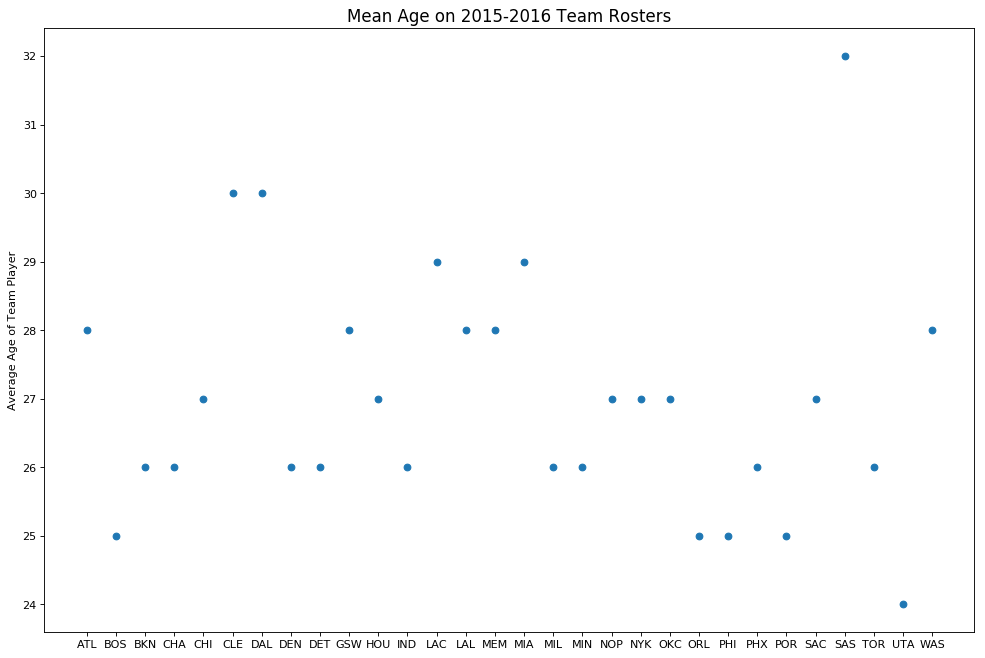

In [164]:
plt.figure(figsize= (15, 10), dpi=80)
plt.scatter(x=df_team['Teams'], y=df_team['Avg_Ages'])
plt.ylabel('Average Age of Team Player', fontsize=10)
plt.title('Mean Age on 2015-2016 Team Rosters', fontsize=15)
plt.show()

In [ ]:
#The San Antonio Spurs has the highest team average age at 32 years while
#the Utah Jazz has the lowest average age of players on their team at 24 
#years. The plot shows very distinctly that 32 years is a lone outlier,
#while the vast majority of the teams are within 2 years of the mean age
#of 26.9 years.

#Fun fact: before doing the analysis, I had surmised that the oldest
#team would likely be the Spurs mostly because SAS Coach Gregg Popovich is
#known to rest his players not only because of injury, but often because 
#of age as well. (DNP: Knee, DNP: Old)

In [ ]:
#I also wished to find out which college was the most popular
#alma mater for the players in the league. 

In [27]:
df.groupby('College').describe()

Number                                                  \
                       count       mean        std   min    25%   50%    75%   
College                                                                        
Alabama                  3.0  22.333333  26.764404   0.0   7.50  15.0  33.50   
Arizona                 13.0  18.076923  12.365689   0.0   9.00  19.0  24.00   
Arizona State            2.0  16.000000   4.242641  13.0  14.50  16.0  17.50   
Arkansas                 3.0   3.000000   1.732051   2.0   2.00   2.0   3.50   
Baylor                   1.0  13.000000        NaN  13.0  13.00  13.0  13.00   
Belmont                  1.0  21.000000        NaN  21.0  21.00  21.0  21.00   
Blinn College            1.0   7.000000        NaN   7.0   7.00   7.0   7.00   
Boston College           2.0   1.000000   0.000000   1.0   1.00   1.0   1.00   
Boston University        1.0  30.000000        NaN  30.0  30.00  30.0  30.00   
Bowling Green            1.0  22.000000        NaN  22.0  22.00  22.0  22.00   
Bucknell                 1.0  31.000000        NaN  31.0  31.00  31.0  31.00   
Butler                   2.0  14.000000   8.485281   8.0  11.00  14.0  17.00   
California               3.0  22.666667  10.503968  12.0  17.50  23.0  28.00   
Central Michigan         1.0  35.000000        NaN  35.0  35.00  35.0  35.00   
Charleston               1.0   0.000000        NaN   0.0   0.00   0.0   0.00   
Cincinnati               2.0   3.500000   3.535534   1.0   2.25   3.5   4.75   
Clemson                  2.0  32.500000   0.707107  32.0  32.25  32.5  32.75   
Cleveland State          1.0  30.000000        NaN  30.0  30.00  30.0  30.00   
Colorado                 3.0  13.000000   7.000000   8.0   9.00  10.0  15.50   
Colorado State           1.0  14.000000        NaN  14.0  14.00  14.0  14.00   
Connecticut              7.0  10.428571  10.612212   0.0   3.00   8.0  14.00   
Creighton                3.0  24.000000  20.074860   3.0  14.50  26.0  34.50   
Davidson                 1.0  30.000000        NaN  30.0  30.00  30.0  30.00   
Dayton                   2.0  12.500000  14.849242   2.0   7.25  12.5  17.75   
DePaul                   1.0  21.000000        NaN  21.0  21.00  21.0  21.00   
Detroit                  1.0   5.000000        NaN   5.0   5.00   5.0   5.00   
Duke                    20.0  16.400000  13.577846   1.0   4.75  10.5  26.25   
Eastern Washington       1.0   2.000000        NaN   2.0   2.00   2.0   2.00   
Florida                 10.0  19.400000  14.818907   3.0   7.00  15.0  31.00   
Florida State            1.0  16.000000        NaN  16.0  16.00  16.0  16.00   
...                      ...        ...        ...   ...    ...   ...    ...   
Stanford                 5.0  12.600000  12.300406   3.0   7.00   8.0  11.00   
Syracuse                 8.0  15.500000  14.726070   1.0   4.50   9.0  27.00   
Temple                   1.0   5.000000        NaN   5.0   5.00   5.0   5.00   
Tennessee                4.0  19.500000  16.360522   0.0   9.00  22.0  32.50   
Tennessee State          1.0  33.000000        NaN  33.0  33.00  33.0  33.00   
Texas                    9.0  17.000000  11.832160   0.0  12.00  13.0  25.00   
Texas A&M                3.0  14.333333   8.020806   6.0  10.50  15.0  18.50   
UC Santa Barbara         2.0   7.500000  10.606602   0.0   3.75   7.5  11.25   
UCLA                    15.0   9.866667  10.493989   0.0   2.00   7.0  13.50   
UNLV                     4.0  30.500000  15.198684  17.0  19.25  27.5  38.75   
USC                      7.0  11.714286  12.566016   0.0   3.00   9.0  16.00   
Utah                     3.0  30.333333  22.188586  12.0  18.00  24.0  39.50   
Utah Valley              1.0  14.000000        NaN  14.0  14.00  14.0  14.00   
Vanderbilt               2.0  27.000000   5.656854  23.0  25.00  27.0  29.00   
Villanova                4.0  15.750000  18.839232   6.0   6.00   6.5  16.25   
Virginia                 2.0  16.500000  21.920310   1.0   8.75  16.5  24.25   
Virginia Commonwealth 

In [38]:
dcf = df.groupby(['College'],as_index=False).count()
dcf
print(dcf.nlargest(20,'Name'))

            College  Name  Team  Number  Position  Age  Height  Weight  \
45         Kentucky    22    22      22        22   22      22      22   
26             Duke    20    20      20        20   20      20      20   
43           Kansas    18    18      18        18   18      18      18   
66   North Carolina    16    16      16        16   16      16      16   
96             UCLA    15    15      15        15   15      15      15   
1           Arizona    13    13      13        13   13      13      13   
28          Florida    10    10      10        10   10      10      10   
93            Texas     9     9       9         9    9       9       9   
89         Syracuse     8     8       8         8    8       8       8   
20      Connecticut     7     7       7         7    7       7       7   
98              USC     7     7       7         7    7       7       7   
107      Washington     7     7       7         7    7       7       7   
31       Georgetown     6     6       

In [99]:
uni_data = {'Colleges': ['KU', 'Duke', 'Kan', 'UNC', 'UCLA', 'AZ', 'FL', 'TX', 'SU', 'UConn'],
            'Num_of_Players': [22, 20, 18, 16, 15, 13, 10, 9, 8, 7]}
df_uni = pd.DataFrame(uni_data, columns = ['Colleges', 'Num_of_Players'])

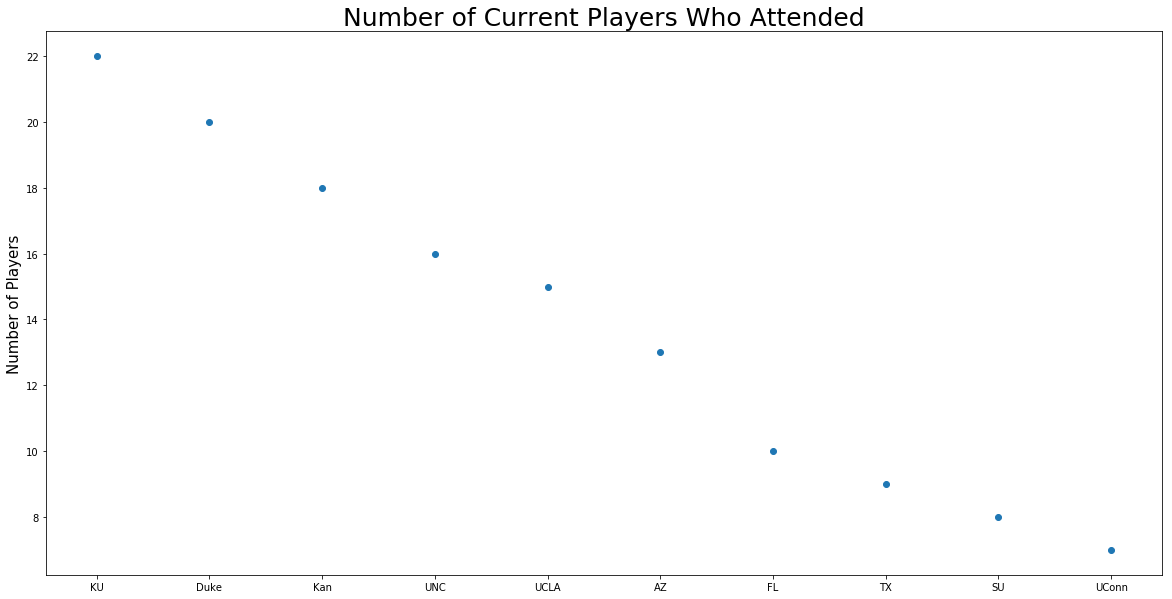

In [161]:
plt.scatter(x=df_uni['Colleges'], y=df_uni['Num_of_Players'])
plt.ylabel('Number of Players', fontsize=15)
plt.title('Number of Current Players Who Attended', fontsize=25)
plt.show()

In [ ]:
#This plot shows the most colleges with the most alumni in the NBA in the
#2015-2016 season, however as stated earlier in the top five analysis,
#some players did not attend college at all. However, this particular
#subset of data would change significantly if one were to look at older
#or much more recent NBA data since in 2006, the requirement for at least
#one year's attendance in college was set in place. In this dataset,
#out of 457 players, 373 players attended college, 84 did not which comes
#out to 81.6%. This could become a significant statistic in later seasons,
#if you wanted to see the effect the college requirement has on a player
#profile, including individual player game performance statistics could
#also give even more insight as well.

In [ ]:
#Given more data science tools and the collection of more NBA
#data over multiple seasons, I would hope to analyze the player profiles
#over the years and compare them to see how an average player in the league
#may or may not change, and if so, which variables change the most. 

#This dataset is not only incomplete, but it is biased in that it only takes
#into consideration one season. I would imagine that as outside factors, 
#such as eligibility requirements, newly developed training programs, 
#improved diet and nutritional regiments, increases to the salary cap, 
#change over time, the "type" of player that is drafted and also 
#developed along the way will inevitably change as well.

#To dramatically improve the analysis and make it more comprehensive,
#if player game data such as performance statistics were
#included alongside the profile data, perhaps a overall "ideal" player
#for each position could be potentially predicted and used for the draft
#or free agent acquisition. In the big picture, this information could help
#organizations to draft and acquire the best possible collection of players
#with the best chances to win!